In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(-0.5, 255.5, 255.5, -0.5)

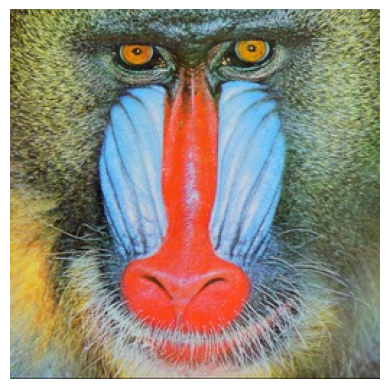

In [2]:
# 讀取圖像
img = cv2.imread('./input/image.jpg')
# 將rotate_img圖像轉為灰度圖像
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 計算梯度和方向
sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
magnitude, angle = cv2.cartToPolar(sobel_x, sobel_y, angleInDegrees=True)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

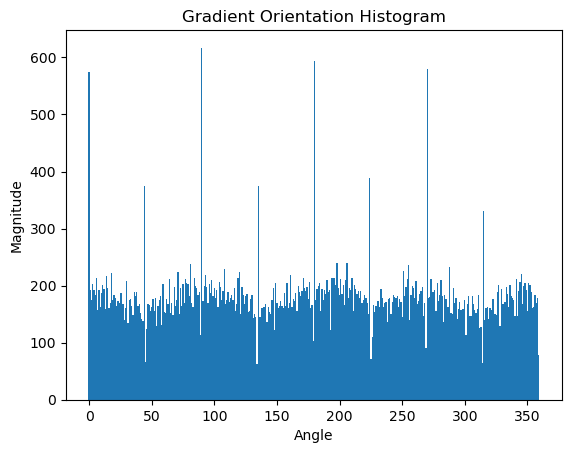

In [3]:
# 繪製梯度方向柱狀圖
hist, bins = np.histogram(angle, bins=360, range=(0, 360))
plt.figure()
plt.bar(bins[:-1], hist, width=1)
plt.title('Gradient Orientation Histogram')
plt.xlabel('Angle')
plt.ylabel('Magnitude')
plt.savefig('histogram_angle.jpg')

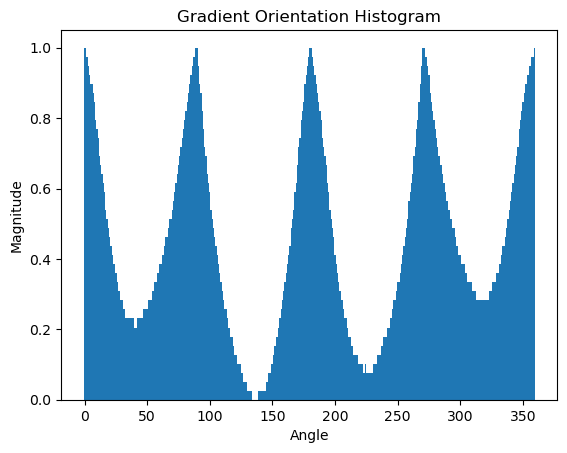

In [4]:
# 設置投票結果陣列
height, width = gray.shape
votes = np.zeros((360, height, width), dtype=np.uint8)

# 投票過程
for ang in range(0, 360):
    radians = ang * np.pi / 180.0
    sin = np.sin(radians)
    cos = np.cos(radians)
    for y in range(1, height - 1):
        for x in range(1, width - 1):
            if magnitude[y, x] > 0:
                x2 = int(x - sin * magnitude[y, x])
                y2 = int(y + cos * magnitude[y, x])
                x2 = max(0, min(x2, width - 1))
                y2 = max(0, min(y2, height - 1))
                votes[ang, y2, x2] += 1

# 繪製投票柱狀圖
hist = [np.sum(votes[ang]) for ang in range(0, 360)]
hist = (hist - np.min(hist)) / (np.max(hist) - np.min(hist))
plt.figure()
plt.bar(range(0,360), hist, width=1)
plt.title('Gradient Orientation Histogram')
plt.xlabel('Angle')
plt.ylabel('Magnitude')
plt.savefig('histogram_vote.jpg')

In [5]:
# 進行分數篩選
score_list = []
for hist_angle in range(0, 360):
    score = 0
    for ang in range(0, 360):
        ang1 = hist_angle-ang if hist_angle-ang >= 0 else hist_angle-ang+360
        ang2 =  hist_angle+ang if hist_angle+ang <= 359 else hist_angle+ang-360
        score = score + hist[ang1] * hist[ang2]
    score_list.append(score)


# 找出最好的分數的角度
candidates_list = []
for ang in range(0, 360):
    if score_list[ang] == np.max(score_list):
        best_angle = ang
        candidates_list.append(ang)
print("Candidate Angles: ",candidates_list)  

Candidate Angles:  [180]


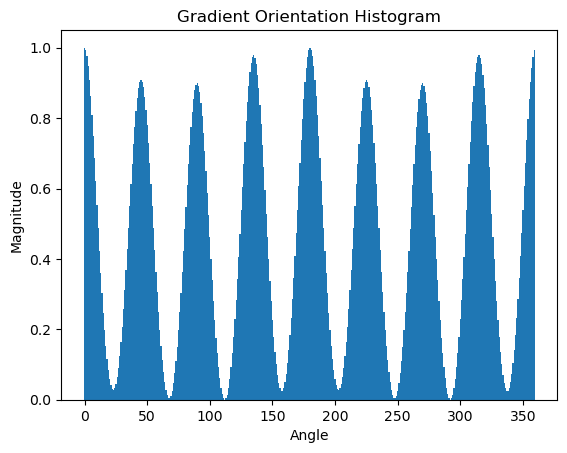

In [6]:
score_list_norm = score_list = (score_list - np.min(score_list)) / (np.max(score_list) - np.min(score_list))
plt.figure()
plt.bar(range(0,360), score_list, width=1)
plt.title('Gradient Orientation Histogram')
plt.xlabel('Angle')
plt.ylabel('Magnitude')
plt.savefig('histogram_score.jpg')

In [7]:
# 找到最佳投票結果中的中點
points = []
best_angle = 180 - best_angle
for y in range(1, height - 1):
    for x in range(1, width - 1):
        if votes[best_angle, y, x] > 0:
            points.append((x, y))
points = np.array(points)
x = np.mean(points[:, 0])
y = np.mean(points[:, 1])

0 (129, 1166) (129, -833)


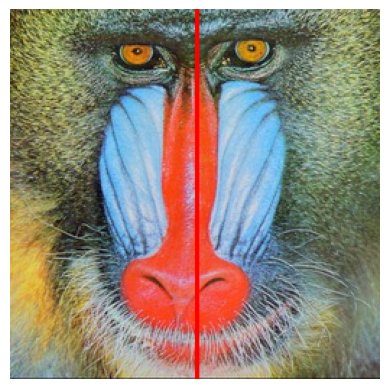

In [8]:
# 繪製對稱軸
radians = best_angle * np.pi / 180.0
sin = np.sin(radians)
cos = np.cos(radians)
pt1 = (int(x - 1000 * sin), int(y + 1000 * cos))
pt2 = (int(x + 1000 * sin), int(y - 1000 * cos))
print(best_angle,pt1,pt2)
cv2.line(img, pt1, pt2, (0, 0, 255), 2)

# 顯示結果
plt.figure()
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.savefig('output.jpg')